In [13]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests

##### Load the pre-trained ResNet-50 model

In [14]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##### Define the transformation for the image

In [15]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

##### Load and transform the image

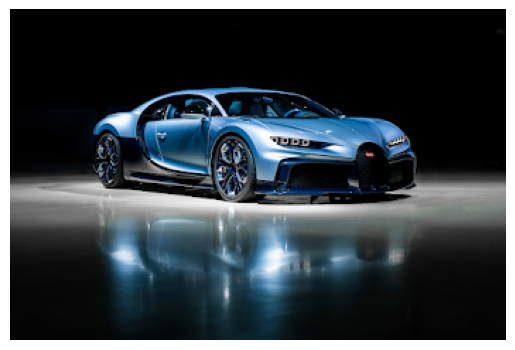

In [16]:
img = Image.open("car.png")
input_tensor = transform(img).unsqueeze(0)
plt.imshow(img)
plt.axis('off')
plt.show()

##### Perform prediction

In [17]:
with torch.no_grad():
    outputs = model(input_tensor)
    probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

##### Get the top 3 predictions

In [18]:
_, indices = torch.topk(probabilities, 3)
indices = indices.squeeze().tolist()

##### Load the class labels

In [19]:
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

##### Display top 3 predictions

In [20]:
for idx in indices:
    print(f"(n{idx:08d}, '{labels[idx]}', {probabilities[idx]:.4f})")

(n00000817, 'sports car', 0.4315)
(n00000751, 'race car', 0.0880)
(n00000479, 'car wheel', 0.0409)


I think the model is working well, I have tried it on different images and the results were as expected, I think Res Net 50 Model is good for general use cases of Image Detection.